In [3]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Dataset clustering with Kmeans

In [4]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv in current directory
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
classes = df.species
objects = df.drop(['species'],axis=1)

In [6]:
km=KMeans(n_clusters=3) # create a KMeans object
km.fit(objects) # compute the clusters
centroids=km.cluster_centers_ # get the cluster centers
print(centroids)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [7]:
clusters = km.labels_ # get cluster labels for all objects
#clusters = km.predict(other_objects) # get closest center for objects in dataframe or numpy array other_objects

In [8]:
# Clustering can be done on a numpy array
np_array = objects.values
km2=KMeans(n_clusters=3).fit(np_array)
centroids2=km2.cluster_centers_
print(centroids2)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [9]:
print(type(clusters))
print(clusters)
print(clusters.shape)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
(150,)


In [10]:
# Default KMeans parameters in sklearn: 
# n_clusters=8, init='k-means++',  n_init=10, max_iter=300, tol=0.0001
km2 = KMeans(n_clusters=3, init='k-means++',  n_init=10, max_iter=300, tol=0.0001).fit(objects)
centroids2=km2.cluster_centers_
print(centroids2)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [11]:
# More basic call: with init='random' and  n_init=1, but setting a random seed with random_state
km2 = KMeans(n_clusters=3, init='random',  n_init=1, random_state=50, max_iter=1000).fit(objects)
centroids2=km2.cluster_centers_
print(centroids2)

[[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]]


# Graphics

In [12]:
#plt.subplots(figsize=(15,10)) # to change figure size
#sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue=clusters, style=classes)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [13]:
# Plot the centroids over the scatter plot of the original data (using species as dot color).
#plt.subplots(figsize=(15,10)) # to change figure size
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")
# then use regplot to plot only some given points (but without performing the regression)
# (the regplot function is similar to seaborn lmplot, with more flexible input formats, but less
# visulization possibilities)
sns.regplot(x=[7, 8], y=[2, 2], scatter=True, fit_reg=False, color="k") # example of 2 black dots
# plot the centroids
sns.regplot(x=centroids[:,df.columns.get_loc("sepal_length")], y=centroids[:,df.columns.get_loc("petal_length")],
            scatter=True, fit_reg=False, marker='x', scatter_kws={"s": 100}, color="r")

AttributeError: module 'seaborn' has no attribute 'scatterplot'

TypeError: only integer scalar arrays can be converted to a scalar index

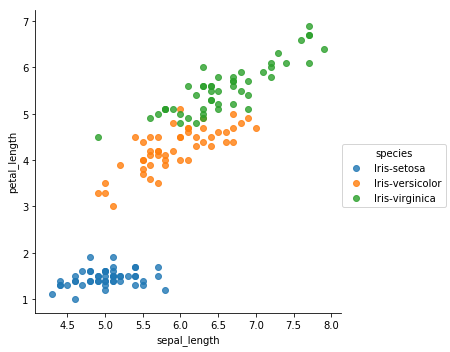

In [14]:
# The same graph using lmplot if scatterplot is not available.
# plot the centroids over the scatter plot
#plt.subplots(figsize=(15,10)) # to change figure size
sns.lmplot(data=df, x="sepal_length", y="petal_length", hue="species", fit_reg=False)
# then use regplot to plot only some given points (but without performing the regression)
sns.regplot(x=[7, 8], y=[2, 2], scatter=True, fit_reg=False, color="k") # example of 2 black dots
# plot the centroids
sns.regplot(x=centroids[:,df.columns.get_loc("sepal_length")], y=centroids[:,df.columns.get_loc("petal_length")],
            scatter=True, fit_reg=False, marker='x', scatter_kws={"s": 100}, color="r")

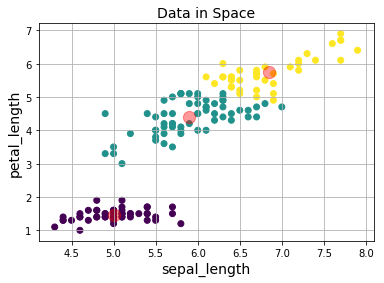

In [15]:
# Using matplotlib.pyplot instead of seaborn.scatterplot to display the clusters.
plt.scatter(df["sepal_length"], df["petal_length"],c=clusters)
plt.title('Data in Space', fontsize=14)
plt.xlabel("sepal_length",fontsize=14)
plt.ylabel("petal_length",fontsize=14 )
plt.scatter(centroids[:, 0], centroids[:, 2], c='red',s=150, alpha=0.4)
plt.grid(True)

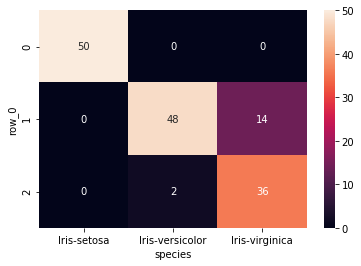

In [16]:
# Contingency table of species vs cluster labels
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

# SSE Measure

In [17]:
# SSE
sse = km.inertia_
print("sse = ",sse)

sse =  78.85144142614601


In [18]:
# Get SSE when varying the number of clusters
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(objects)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)
    

[152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.03998724608725, 34.29822966507177, 30.186555194805198, 28.144929193613407, 25.972099624060153]


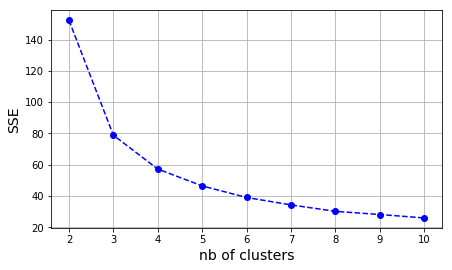

In [19]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

# Miscellaneous

In [20]:
centroids[:,df.columns.get_loc("sepal_length")] # sepal_length of the centroids

array([5.006    , 5.9016129, 6.85     ])